In [1]:
#importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## 1. Read the dataset and understand the features and target variable

In [2]:
# Bankruptcy dataset is consisting of no headers in the dataset that should be handled seperately by setting header parameter to None
# Names of the columns should be mentioned explicitly using the names parameter while loading.
df = pd.read_csv("Qualitative_Bankruptcy.data.txt",header=None,names=['Industrial_Risk','Management_Risk','Financial_Flexibility','Credibility','Competitiveness','Operating_Risk','Class'])
df.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [3]:
df.tail()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B
249,P,N,N,N,A,A,B


In [4]:
# dataset is having 250 records and 7 columns
# there are no missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial_Risk          250 non-null object
Management_Risk          250 non-null object
Financial_Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating_Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [5]:
# 'Industrial_Risk','Management_Risk','Financial_Flexibility','Credibility','Competitiveness' and 'Operating_Risk' are the features used
# All the feature attributes are qualitative features and there are no numeric features
# All the above features has {P,N,A} which represents P : Positive and N : Negative and A : Average
X = df.iloc[:,:-1]
X.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


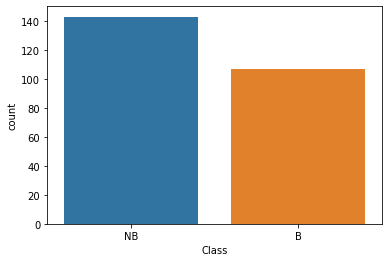

In [6]:
# Class is the target variable which shows whether each record is bankrupt or not bankrupt
# distribution of class shows 143 instances For Non-Bankruptcy and 107 instances For Bankruptcy
# Hence dataset looks pretty balanced
sns.countplot(df.Class)
plt.show()

## 2. Encode independent features

In [7]:
# Since all the independent attributes are ordinal features we should use label encoder to encode the features
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)
X_encoded.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


## 3. Separate the dependant variable from the rest of the train data

In [8]:
target = df.Class

In [9]:
target.value_counts()

NB    143
B     107
Name: Class, dtype: int64

## 4. Split the dataset into training and test data ( Take 80:20 ratio)

In [10]:
X_train,X_test = train_test_split(X_encoded,random_state=100,test_size=0.2,shuffle =True)

In [11]:
print("Shape of X_train : ",X_train.shape,"\nShape of X_test :",X_test.shape)

Shape of X_train :  (200, 6) 
Shape of X_test : (50, 6)


In [12]:
X_train.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk
42,0,1,2,0,2,1
239,1,1,1,1,1,1
189,0,1,1,1,1,1
145,1,2,1,1,1,1
48,0,1,1,0,2,2


## 5. Apply PCA on the independent features of train data

In [13]:
from sklearn.decomposition import PCA
X_centered = X_train - X_train.mean(axis=0)
pca = PCA()
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
explained_var = pca.explained_variance_
explained_var = explained_var/(np.sum(explained_var))
explained_var

array([0.23860646, 0.20480407, 0.17772232, 0.14432504, 0.13101422,
       0.10352788])

In [15]:
cum_var_exp = np.cumsum(explained_var) 
cum_var_exp

array([0.23860646, 0.44341053, 0.62113286, 0.76545789, 0.89647212,
       1.        ])

## 6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance)

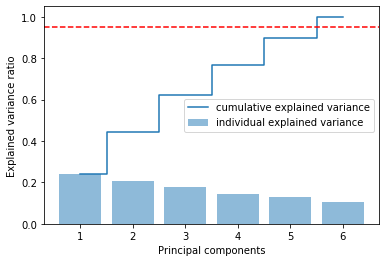

In [16]:
plt.bar(range(1,7), explained_var, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [17]:
# since there is no correlation among the independent features pca doesn't help us reduce to number of dimentions 
# all the principal components are required to explain more than 95% variance
# Hence optimum number of principal components = 6

## 7. Transform the data using PCA ( select optimum number of PCs)

In [18]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## 8. Apply KMeans algorithm on the above transformed data

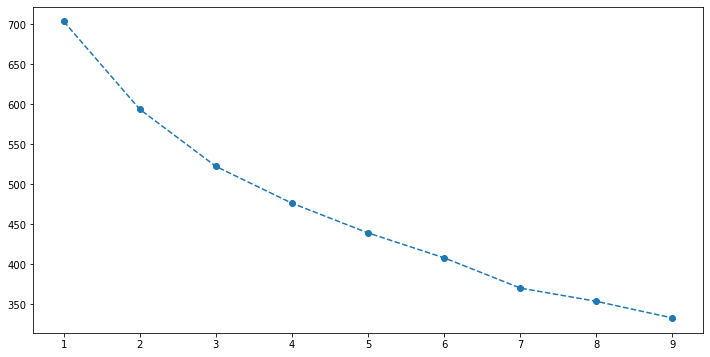

In [19]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X_train)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
plt.figure(figsize = (12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" ,linestyle='dashed')
plt.show()

## 9. Select optimal number of clusters and form clusters out of the train data.

In [20]:
# selecting k=4
kmeans = KMeans(4,n_init = 5)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## 10. Create a new column in the train data and populate it with the cluster labels

In [21]:
train_labels = kmeans.labels_
X_train = pd.DataFrame(X_train)
X_train['cluster'] = train_labels
X_train.head()

,0,1,2,3,4,5,cluster
0,1.004770,-0.803512,-0.012220,1.455361,0.199906,-0.299948,1
1,0.012634,0.011152,-0.011369,-0.001316,-0.148493,0.029745,2
2,0.573631,0.572551,-0.128440,0.525676,0.082033,-0.130084,1
3,-0.478768,0.145726,-0.074197,0.549570,-0.115961,0.686961,2
4,0.298770,-0.378642,-0.164126,1.149317,1.212520,-0.722942,1


## 11. Transform the test data using the same PCA object that was fit on the train data.

In [22]:
X_test = pca.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5
0,1.708973,-0.584578,-1.028782,-0.110641,-1.031623,0.887587
1,0.480423,0.093709,-1.410202,-0.563436,-1.427843,-1.239170
2,1.073567,1.328556,-1.465234,-0.388374,0.200987,-0.578435
3,1.261924,0.295569,-1.179761,-0.268126,-1.460108,-0.784027
4,0.510439,0.454698,-2.142633,-0.999659,-0.067017,-0.700474


## 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature.

In [23]:
X_test['cluster'] = kmeans.predict(X_test)
X_test.head()

,0,1,2,3,4,5,cluster
0,1.708973,-0.584578,-1.028782,-0.110641,-1.031623,0.887587,1
1,0.480423,0.093709,-1.410202,-0.563436,-1.427843,-1.239170,1
2,1.073567,1.328556,-1.465234,-0.388374,0.200987,-0.578435,1
3,1.261924,0.295569,-1.179761,-0.268126,-1.460108,-0.784027,1
4,0.510439,0.454698,-2.142633,-0.999659,-0.067017,-0.700474,1


## 13. Apply SVC model on train dataset and predict target for test dataset.

In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train.drop('cluster',axis = 1),X_train.cluster)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## 14. Check accuracy and confusion matrix.

In [25]:
predictions = svc.predict(X_test.drop('cluster',axis=1))
print("Accuracy Score : ",metrics.accuracy_score(X_test.cluster,predictions),"\nConfusion Matrix : \n",metrics.confusion_matrix(X_test.cluster,predictions))


Accuracy Score :  0.96 
Confusion Matrix : 
 [[47  2]
 [ 0  1]]
